# Project: Investigate TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project describes the detailed data analysis carried out on **TMDb Movie Dataset**. The dataset has been taken from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata).

It consists of metadata on 10866 movies from TMDb (*The Movie Database*) and 21 columns consisting of features like popularity, movie budget, revenue made by the movie (both in 2010 USD), the movie's original title, movie's cast, etc. 

In this project, I will try to investigate the following.

**Question 1**: Movies with maximum and minimum revenue

**Question 2**: Movies with maximum and minimum popularity

**Question 3**: Movies with maximum and minimum voting score

**Question 4**: Number of movies released year by year

**Question 5**: Features present in movies with high popularity

**Question 6**: Features present in movies with high voting score

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Inline visualization
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load the dataset
dataset = pd.read_csv("tmdb-movies.csv")

In [3]:
# View first 1st entry
dataset.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
dataset.shape

(10866, 21)

In [5]:
dataset.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Information gathered from dataset

1. The dataset has total **21 columns** and **10866 rows**. 
2. There are several **missing values** as well (specifically in **homepage**, **director**, **cast**, **tagline**, **keywords**, and other columns).
3. **vote_count** is different for all the movies, so we cannot directly conclude the popularity of the movies based on the average vote count

### Data Cleaning

In the beginning phase, we can safely remove the following columns:

1. `imdb_id`
2. `cast`
3. `homepage`
4. `director`
5. `tagline`
6. `keywords`
7. `overview`
8. `production_companies`

In [7]:
# Drop irrelevant columns
dataset.drop(['imdb_id',
             'cast',
              'homepage',
              'director',
              'tagline',
              'keywords',
              'overview',
              'production_companies'],
       axis = 1,
       inplace=True)

In [8]:
dataset.head(1)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.1+ MB


Let's also remove any duplicate rows.

In [10]:
dataset.drop_duplicates(inplace=True)

In [11]:
dataset.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


As is clear, the minimum value for **budget**, **revenue**, **runtime**, **budget_adj** and **revenue_adj** is 0. This possibly means that the actual values were not present for those movies. Let's remove all those rows.

In [12]:
replace_col = ['budget','revenue','runtime','budget_adj','revenue_adj']

# Convert 0s to NaN
dataset[replace_col] = dataset[replace_col].replace(0,np.NAN)

# Drop NAN rows
dataset.dropna(inplace=True)

In [13]:
dataset.shape

(3854, 13)

In [14]:
dataset.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
id                3854 non-null int64
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
runtime           3854 non-null float64
genres            3854 non-null object
release_date      3854 non-null object
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
dtypes: float64(7), int64(3), object(3)
memory usage: 421.5+ KB


Now we have a total of 3854 rows, 13 columns to analyse. There is no missing data.

<a id='eda'></a>
## Exploratory Data Analysis

Now that we have pre-processed our data, let's carry out EDA.

In [23]:
# List all the columns
dataset.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

We can ignore **id**. Let's now start with **popularity** feature.

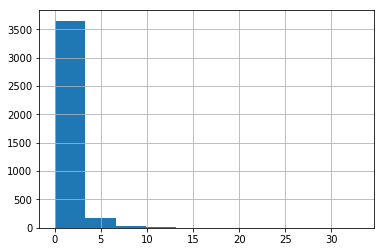

In [26]:
dataset['popularity'].hist();

*As is clear from the histogram, most of the movies have a popularity between 0 and 4. And a very less number of movies have popularity more than 10.*

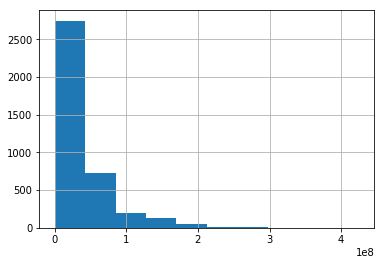

In [27]:
dataset['budget'].hist();

*The histogram shows that maximum movies have their budget between 0 and 0.5e8. And a very low number of movies have budget more than 2e8.*

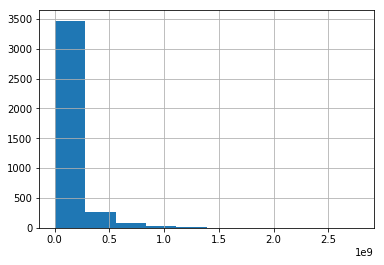

In [28]:
dataset['revenue'].hist();

*It's interesting to note that the histogram of* **revenue** *and* **popularity** *is very similar.*

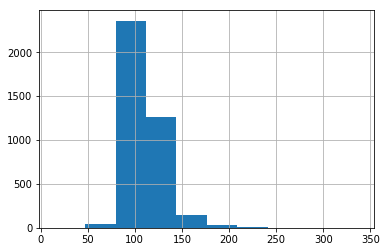

In [29]:
dataset['runtime'].hist();

*The histogram of **runtime** is really close to normal distribution or slightly right skewed.*

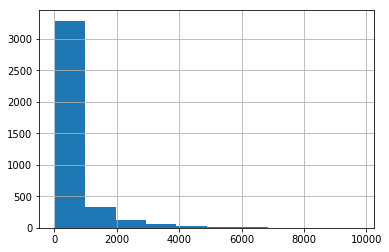

In [30]:
dataset['vote_count'].hist();

*The similar shape of histograms of **vote_count**, **revenue** and **popularity** might be an indication of a strong positive relationship between these features.*

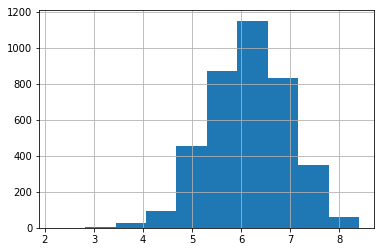

In [31]:
dataset['vote_average'].hist();

*The histogram of **vote_average** recognizes a normal distribution.*

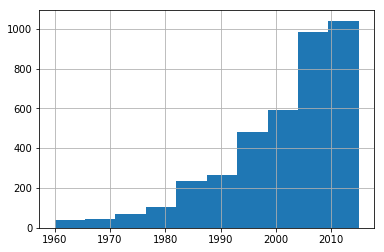

In [32]:
dataset['release_year'].hist();

*The histogram of **release_year** is left skewed. The number of movies released is on a continuous increase since 1960*.

**Let's now explore a relationship between different features**

### Popularity vs Revenue

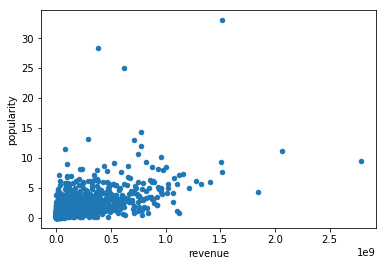

In [35]:
dataset.plot(x='revenue',y='popularity',kind='scatter');

### Budget vs Revenue

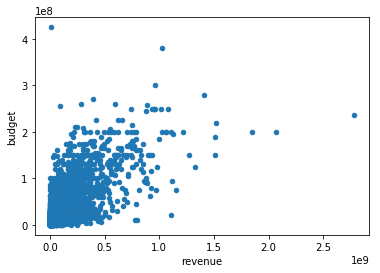

In [36]:
dataset.plot(x='revenue',y='budget',kind='scatter');

### Popularity vs Budget

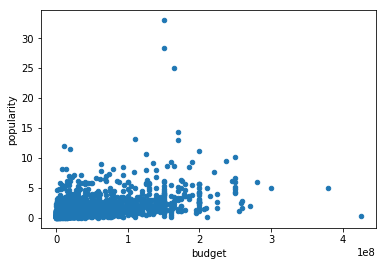

In [43]:
dataset.plot(x='budget',y='popularity',kind="scatter");

As is clear from both the scatter plots, there is a positive correlation between revenue and budget and revenue and popularity. There is also a slightly positive correlation between popularity and budget. As expected, there is a stronger relationship between popularity and revenue than popularity and budget.

### Question 1: Movies with maximum and minimum revenue

In [44]:
# Movie with maximum revenue
dataset[dataset['revenue'] == dataset['revenue'].max()]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,162.0,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


In [45]:
# Movie with minimum revenue
dataset[dataset['revenue'] == dataset['revenue'].min()]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5067,13537,0.462609,6000000.0,2.0,Shattered Glass,94.0,Drama|History,11/14/03,46,6.4,2003,7.112116e+06,2.370705
8142,2293,0.552091,6000000.0,2.0,Mallrats,94.0,Romance|Comedy,10/20/95,201,6.8,1995,8.585801e+06,2.861934


**Avatar** has the highest revenue whereas **Shattered Glass** and **Mallrats** have the lowest revenue.

### Question 2: Movies with maximum and minimum popularity

In [46]:
# Maximum popularity
dataset[dataset['popularity'] == dataset['popularity'].max()]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [47]:
# Minimum popularity
dataset[dataset['popularity'] == dataset['popularity'].min()]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7268,1392,0.001117,350000.0,3515061.0,Born into Brothels,85.0,Documentary,12/8/04,23,6.4,2004,404055.889934,4.057946e+06


**Jurassic World** has the maximum popularity whereas **Born into Brothels** has the minimum popularity.

### Question 3: Movies with maximum and minimum voting score

Since the vote count for each movie is different, we will use average voting score to compare scores across movies.

In [48]:
# Maximum voting score
dataset[dataset['vote_average'] == dataset['vote_average'].max()]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4178,278,7.192039,25000000.0,28341469.0,The Shawshank Redemption,142.0,Drama|Crime,9/10/94,5754,8.4,1994,3.677779e+07,4.169346e+07
7948,24128,0.283191,1200000.0,4978922.0,Stop Making Sense,88.0,Documentary|Music,11/16/84,23,8.4,1984,2.518850e+06,1.045097e+07


In [49]:
# Minimum voting score
dataset[dataset['vote_average'] == dataset['vote_average'].min()]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4859,116977,0.111351,65000000.0,73706.0,Foodfight!,87.0,Animation|Action|Comedy|Family,6/15/12,12,2.2,2012,6.173338e+07,70001.852001


**The Shawshank Redemption** and **Stop Making Sense** have the maximum voting score whereas **Foodfight!** has the minimum voting score.

### Question 4: Number of movies released year by year

In [55]:
dataset.groupby('release_year').size()

release_year
1960      5
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     17
1979     16
1980     23
1981     30
1982     26
1983     31
1984     42
1985     41
1986     48
1987     46
1988     57
1989     51
1990     53
1991     50
1992     53
1993     72
1994     62
1995     81
1996     86
1997     90
1998     92
1999    116
2000    106
2001    121
2002    127
2003    121
2004    147
2005    163
2006    169
2007    165
2008    167
2009    174
2010    178
2011    199
2012    158
2013    180
2014    165
2015    160
dtype: int64

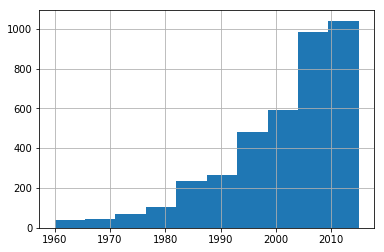

In [56]:
dataset['release_year'].hist();

From the histogram and the table above, it's clear that the number of released movies is on an increase.

### Question 5: Features present in movies with high popularity

In [57]:
dataset.head(1)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


Let's now divide the popularity into two parts based on the median.

In [59]:
high_pop = dataset.query('popularity > {}'.format(dataset['popularity'].median()))
low_pop = dataset.query('popularity <= {}'.format(dataset['popularity'].median()))

In [60]:
high_pop.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1927.000000,1927.000000,1.927000e+03,1.927000e+03,1927.000000,1927.000000,1927.000000,1927.000000,1.927000e+03,1.927000e+03
mean,48228.267774,1.926114,5.257830e+07,1.778594e+08,111.758692,923.537623,6.378153,2003.164504,5.989180e+07,2.193305e+08
std,77677.591360,1.798779,4.991372e+07,2.205608e+08,20.237079,1082.666068,0.755262,10.916583,5.172394e+07,2.685121e+08
min,5.000000,0.797723,2.100000e+01,4.200000e+01,63.000000,10.000000,3.300000,1960.000000,3.169887e+01,6.339774e+01
25%,1993.000000,1.042908,1.700000e+07,4.375245e+07,97.000000,283.500000,5.900000,1998.000000,2.205247e+07,5.529595e+07
50%,10138.000000,1.368403,3.500000e+07,1.081451e+08,108.000000,551.000000,6.400000,2006.000000,4.326677e+07,1.328373e+08
75%,57507.000000,2.148295,7.000000e+07,2.196030e+08,123.000000,1098.500000,6.900000,2011.000000,8.385196e+07,2.777767e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,248.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09


In [62]:
low_pop.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1927.000000,1927.000000,1.927000e+03,1.927000e+03,1927.000000,1927.000000,1927.000000,1927.000000,1.927000e+03,1.927000e+03
mean,31548.102750,0.456994,2.182910e+07,3.751386e+07,106.681889,131.902958,5.958173,1999.357551,2.858819e+07,5.479892e+07
std,53545.198136,0.194972,2.448697e+07,6.203095e+07,19.277204,251.751514,0.778117,11.324182,2.917538e+07,8.826884e+07
min,59.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,9430.500000,0.303678,6.000000e+06,5.365944e+06,94.000000,34.000000,5.400000,1993.000000,8.614552e+06,7.167460e+06
50%,11962.000000,0.462287,1.500000e+07,1.863769e+07,103.000000,74.000000,6.000000,2002.000000,2.025573e+07,2.629205e+07
75%,25185.500000,0.613465,3.000000e+07,4.608125e+07,115.000000,149.000000,6.500000,2008.000000,3.847119e+07,6.684051e+07
max,343795.000000,0.797298,4.250000e+08,1.123747e+09,338.000000,4368.000000,8.400000,2015.000000,4.250000e+08,1.089358e+09


Using both the descriptions, we can conclude that:

1. More popular movies have a higher average budget and earn a higher average revenue.
2. More popular movies also have a higher average vote score.
3. On an average, more popular movies have been released in 21st century whereas the less popular ones were released in 20th century.

### Question 6: Features present in movies with high voting score

In [64]:
high_vote = dataset.query('vote_average > {}'.format(dataset['vote_average'].median()))
low_vote = dataset.query('vote_average <= {}'.format(dataset['vote_average'].median()))

In [65]:
high_vote.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1810.000000,1810.000000,1.810000e+03,1.810000e+03,1810.000000,1810.000000,1810.00000,1810.000000,1.810000e+03,1.810000e+03
mean,38815.917127,1.549202,3.702025e+07,1.387977e+08,115.197238,793.616022,6.83768,1999.791160,4.463451e+07,1.825898e+08
std,69557.485734,1.936018,4.604141e+07,2.220458e+08,22.131380,1145.825738,0.42277,12.555175,4.796147e+07,2.735890e+08
min,5.000000,0.001117,3.000000e+00,2.000000e+00,15.000000,10.000000,6.30000,1960.000000,3.000000e+00,2.370705e+00
25%,1808.250000,0.538588,8.000000e+06,1.764219e+07,100.000000,111.250000,6.50000,1993.000000,1.253202e+07,2.427255e+07
50%,10330.500000,1.012008,2.000000e+07,5.627681e+07,112.000000,354.000000,6.70000,2003.000000,2.846459e+07,8.308796e+07
75%,37059.250000,1.847399,4.600000e+07,1.557504e+08,126.000000,955.000000,7.10000,2010.000000,5.885327e+07,2.192492e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,248.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


In [66]:
low_vote.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2044.000000,2044.000000,2.044000e+03,2.044000e+03,2044.000000,2044.000000,2044.000000,2044.000000,2.044000e+03,2.044000e+03
mean,40837.698630,0.874851,3.736614e+07,8.013718e+07,103.927593,292.264677,5.575294,2002.562622,4.389064e+07,9.675137e+07
std,65087.358661,0.755971,3.850738e+07,1.162060e+08,15.974853,423.905248,0.533545,9.843190,4.182886e+07,1.354322e+08
min,27.000000,0.010335,1.000000e+00,5.000000e+00,66.000000,10.000000,2.200000,1961.000000,9.693980e-01,6.951084e+00
25%,9370.750000,0.410079,1.100000e+07,1.140635e+07,93.000000,51.000000,5.300000,1997.000000,1.360312e+07,1.500240e+07
50%,12209.500000,0.678802,2.500000e+07,3.682505e+07,101.000000,144.000000,5.700000,2005.000000,3.153443e+07,4.637942e+07
75%,41321.250000,1.084270,5.000000e+07,1.026038e+08,112.000000,334.000000,6.000000,2010.000000,6.157441e+07,1.223814e+08
max,343795.000000,8.654359,2.700000e+08,1.123747e+09,338.000000,3559.000000,6.200000,2015.000000,2.920507e+08,1.583050e+09


It can be concluded from both the descriptions that:

1. There are more movies with lower average vote score.
2. Movies with lower vote score tend to have a lower popularity.
3. On an average, the budget of movies with lower average vote score was higher but the revenue earned was higher.
4. Runtime for movies with lower average vote score was lower.
5. Vote count for movies with lower average vote score was also lower.

<a id='conclusions'></a>
## Conclusions

From the figures and analysis carried out, for a movie to be more popular,

1. It should have an average budget of 53 million
2. Average runtime of the movie should be 112 minutes

For a movie to have a higher voting average score,

1. Runtime should be 115 minutes. 
2. The average budget of the movie should be 37 million

This means that on an average, it takes a movie of comparatively lower budget but longer runtime to have a higher voting average score rather than having a higher popularity.

Because of the rows dropped (with 0 as budget, and other features), we have potentially lost a lot of data. Even the units of a lot of features is not clear and this can also mean that the data reported may not be in the same units. We also cannot be sure that the darta provided is up